In [1]:
# on SIMON local, use conda env pytroch_2023

DIR = !pwd # bc we can't do Path(__file__) in a ipynb

import numpy as np
import pandas as pd
from pathlib import Path
import sys
import pickle
import wandb
from matplotlib import pyplot as plt

PATH = Path(str(DIR)[2:-2]) # bc the !pwd returns a list

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("views_pipeline")+1]]) / "common_utils")) # PATH_COMMON_UTILS  
from set_path import setup_project_paths, setup_data_paths
setup_project_paths(PATH)

from config_hyperparameters import get_hp_config
from utils import get_data

Root path: /home/simon/Documents/scripts/views_pipeline
Common utils path: /home/simon/Documents/scripts/views_pipeline/common_utils
Common configs path: /home/simon/Documents/scripts/views_pipeline/common_configs
Adding /home/simon/Documents/scripts/views_pipeline/common_configs to sys.path
Adding /home/simon/Documents/scripts/views_pipeline/models/purple_alien/configs to sys.path
Adding /home/simon/Documents/scripts/views_pipeline/models/purple_alien/src/utils to sys.path
Adding /home/simon/Documents/scripts/views_pipeline/models/purple_alien/src/architectures to sys.path
Root path: /home/simon/Documents/scripts/views_pipeline
Common utils path: /home/simon/Documents/scripts/views_pipeline/common_utils
Common configs path: /home/simon/Documents/scripts/views_pipeline/common_configs


In [2]:
# this jazz is just to emulate the behavior of the scripts which all uses the waandb.init() to get the config

config_dict = get_hp_config()
config_dict['model_type'] = 'calibration'

wandb.init(config=config_dict)
config = wandb.config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: simpol (nornir). Use `wandb login --relogin` to force relogin


# CALIBRATION:

In [3]:
# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/calibration_viewser_data.pkl', 'rb') as file: # not machine agnostic
    views_df = pickle.load(file)

In [4]:
views_df.head() # looks legit...

,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,in_viewser,abs_row,abs_col,abs_month
1573200,121,62356,1,1990,192,436,87,0.0,0.0,0.0,True,0,126,0
1573201,121,79599,1,1990,192,399,111,0.0,0.0,0.0,True,24,89,0
1573202,121,79600,1,1990,192,400,111,0.0,0.0,0.0,True,24,90,0
1573203,121,79601,1,1990,192,401,111,0.0,0.0,0.0,True,24,91,0
1573204,121,80317,1,1990,192,397,112,0.0,0.0,0.0,True,25,87,0


In [6]:
print(views_df['month_id'].unique())

print(views_df['month_id'].unique().shape) # 12 months, 1 year 

[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 36

In [7]:
views_vol = get_data(config)

In [13]:
views_vol.shape

(324, 180, 180, 8)

In [14]:
np.unique(views_vol[:,:,:,3]) # look legit - check partation config

array([  0., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189., 190., 191., 192., 193., 194., 195., 196.,
       197., 198., 199., 200., 201., 202., 203., 204., 205., 206., 207.,
       208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218.,
       219., 220., 221., 222., 223., 224., 225., 226., 227., 228., 229.,
       230., 231., 232., 233., 234., 235., 236., 237., 238., 239., 240.,
       241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251.,
       252., 253., 254., 255., 256., 257., 258., 259., 260., 261., 262.,
       263., 264., 265., 266., 267., 268., 269., 27

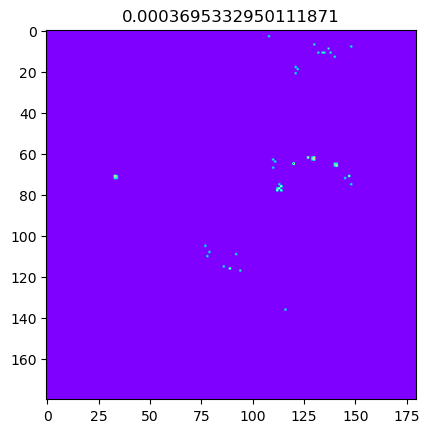

In [15]:
plt.imshow(views_vol[0,:,:,5], cmap = 'rainbow')
plt.title(views_vol[0,:,:,6].mean())
plt.show()

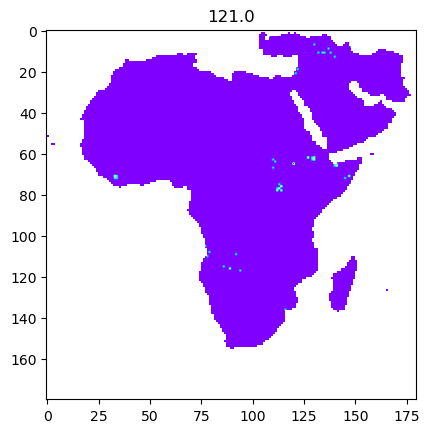

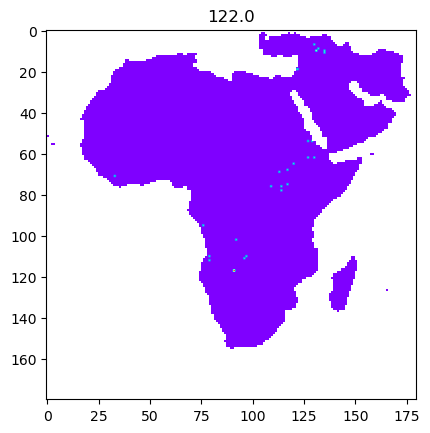

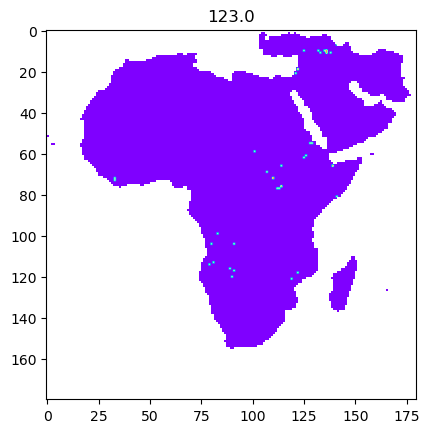

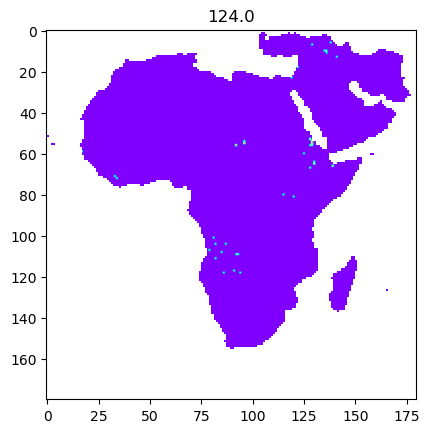

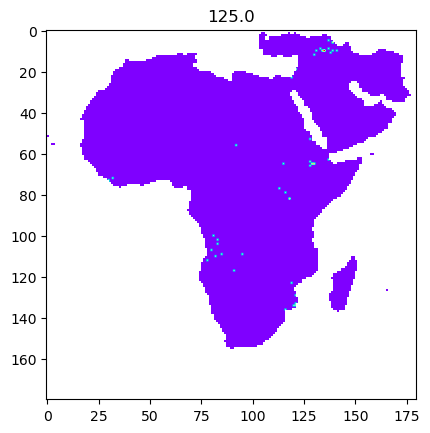

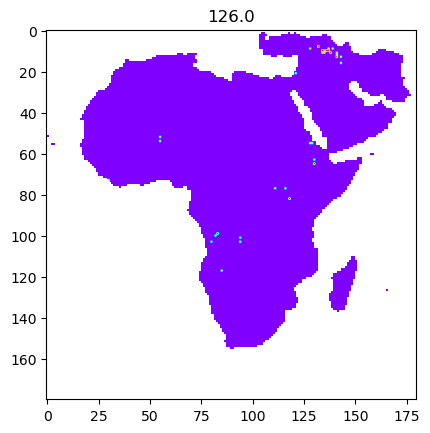

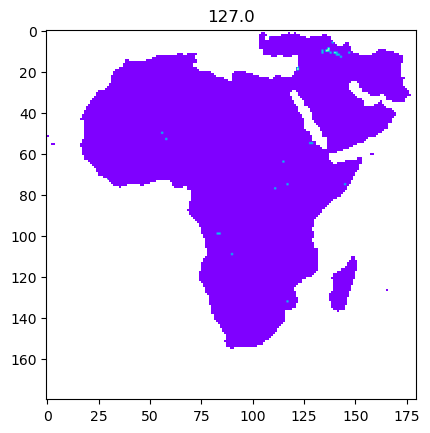

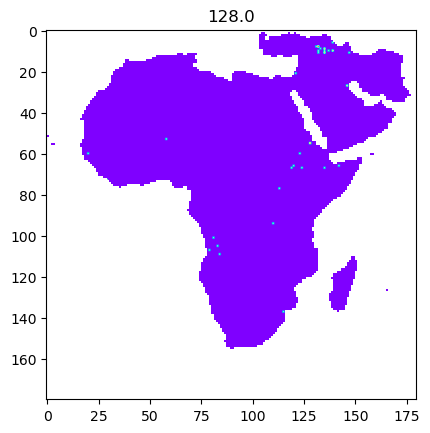

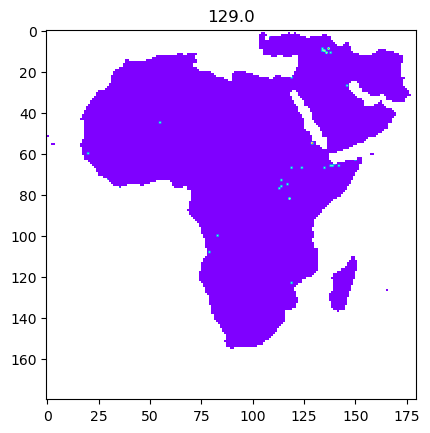

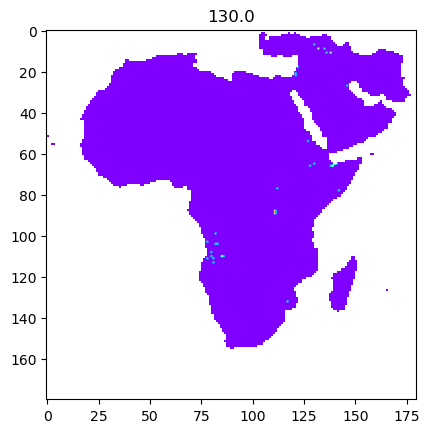

In [19]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[i,:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(views_vol[i,:,:,3].max()) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()

In [ ]:
# make a timeleapse of the above to see if it makes sense


# TEST

# FORECASTING 